# Part 2


1. [Heatmaps for seasonality/time pattern detection](#1)
2. [Crickmay dataset: 1 day and 1-month aggregates]((#2)
3. [Export to excel for further visualization of correlations](#3)
    - between time and number of trucks crossing the border (Crickmay)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<a id="1"></a>

## Crickmay dataset: pattern detection in time series (heatmaps)

In [4]:
df1 = pd.read_csv("C:/Users/shume/Desktop/6501.81_Capstone Project/Refrences Data Comparision/Reference Data/stacked data BB (both directions, counts and minutes)CBCE.csv")
df1

,Unnamed: 0,date,StartHour,Direction,var,value,year,month,YM
0,0,2017-02-01,0.0,SA-Zimbabwe,Border_Crossing_Count_Events,22.000000,2017,2,2017-02
1,1,2017-02-01,13.0,SA-Zimbabwe,Border_Crossing_Count_Events,4.000000,2017,2,2017-02
2,2,2017-02-01,12.0,SA-Zimbabwe,Border_Crossing_Count_Events,1.000000,2017,2,2017-02
3,3,2017-02-01,14.0,SA-Zimbabwe,Border_Crossing_Count_Events,2.000000,2017,2,2017-02
4,4,2017-02-01,14.0,Zimbabwe-SA,Border_Crossing_Count_Events,2.000000,2017,2,2017-02
...,...,...,...,...,...,...,...,...,...
273267,273267,2023-02-28,11.0,SA-Zimbabwe,Border_Crossing_Top_10__Minutes,2493.303333,2023,2,2023-02
273268,273268,2023-02-28,11.0,Zimbabwe-SA,Border_Crossing_Top_10__Minutes,1039.870000,2023,2,2023-02
273269,273269,2023-02-28,12.0,SA-Zimbabwe,Border_Crossing_Top_10__Minutes,3717.906666,2023,2,2023-02
273270,273270,2023-02-28,19.0,Zimbabwe-SA,Border_Crossing_Top_10__Minutes,3773.300000,2023,2,2023-02


In [5]:
df1['date'] = pd.to_datetime(df1['date'])

In [6]:
df1['year'] =df1['date'].dt.year
df1['month'] =df1['date'].dt.month
df1['day'] =df1['date'].dt.day

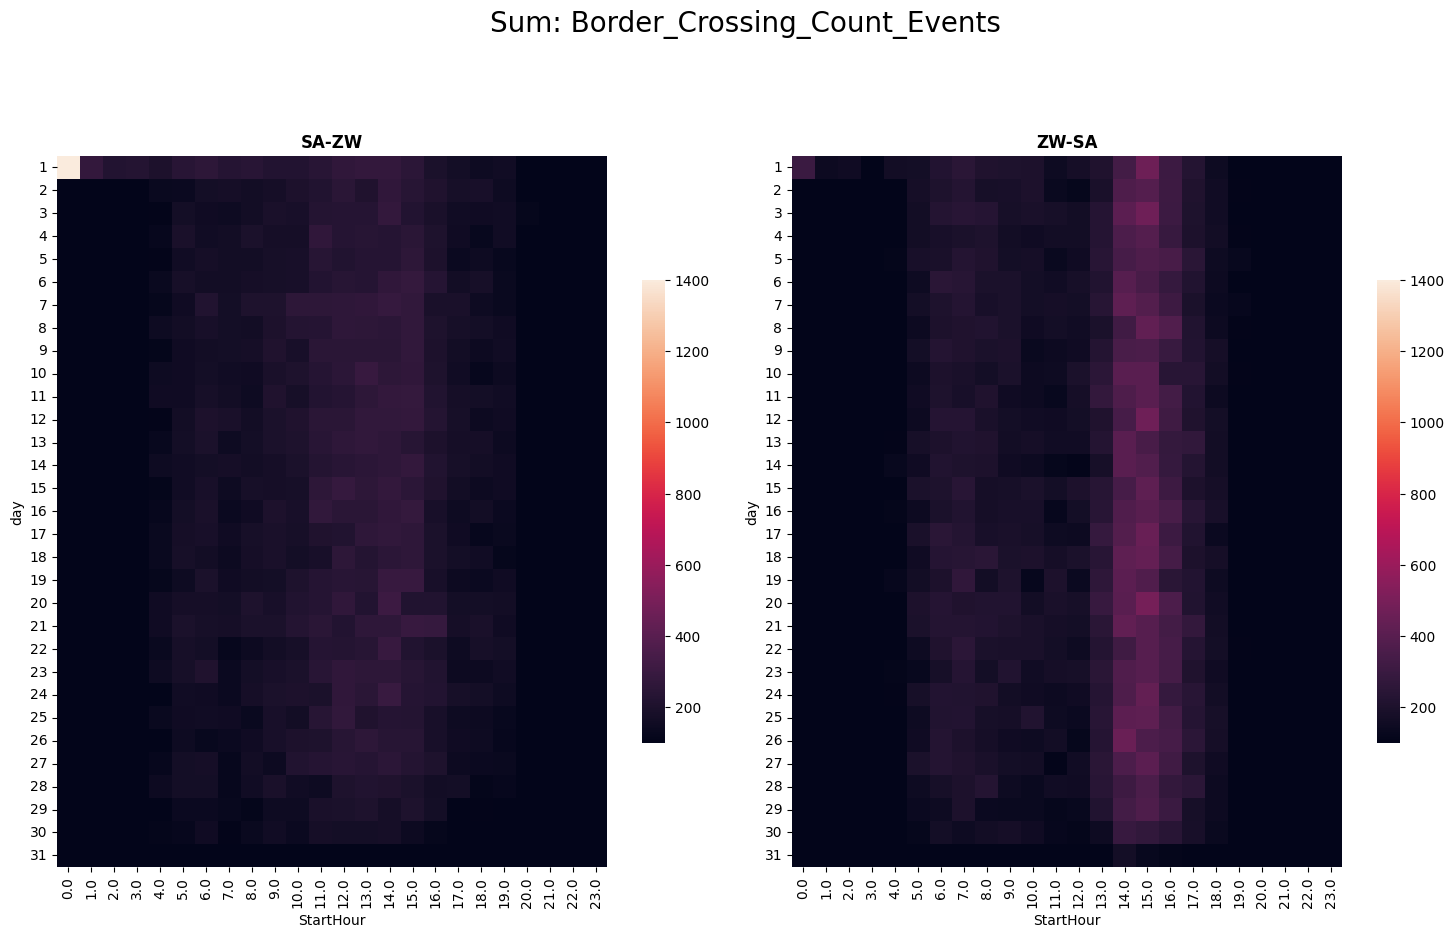

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='SA-Zimbabwe')],index='day',columns='StartHour',values='value',aggfunc='sum')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='Zimbabwe-SA')],index='day',columns='StartHour',values='value',aggfunc='sum')

sns.heatmap(s1, ax=ax1,square=True, vmax=1400, vmin=100, cbar_kws={"shrink": 0.5})
sns.heatmap(s2, ax=ax2,square=True, vmax=1400, vmin=100, cbar_kws={"shrink": 0.5})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Sum: Border_Crossing_Count_Events', fontsize=20)
plt.tight_layout()

plt.show()

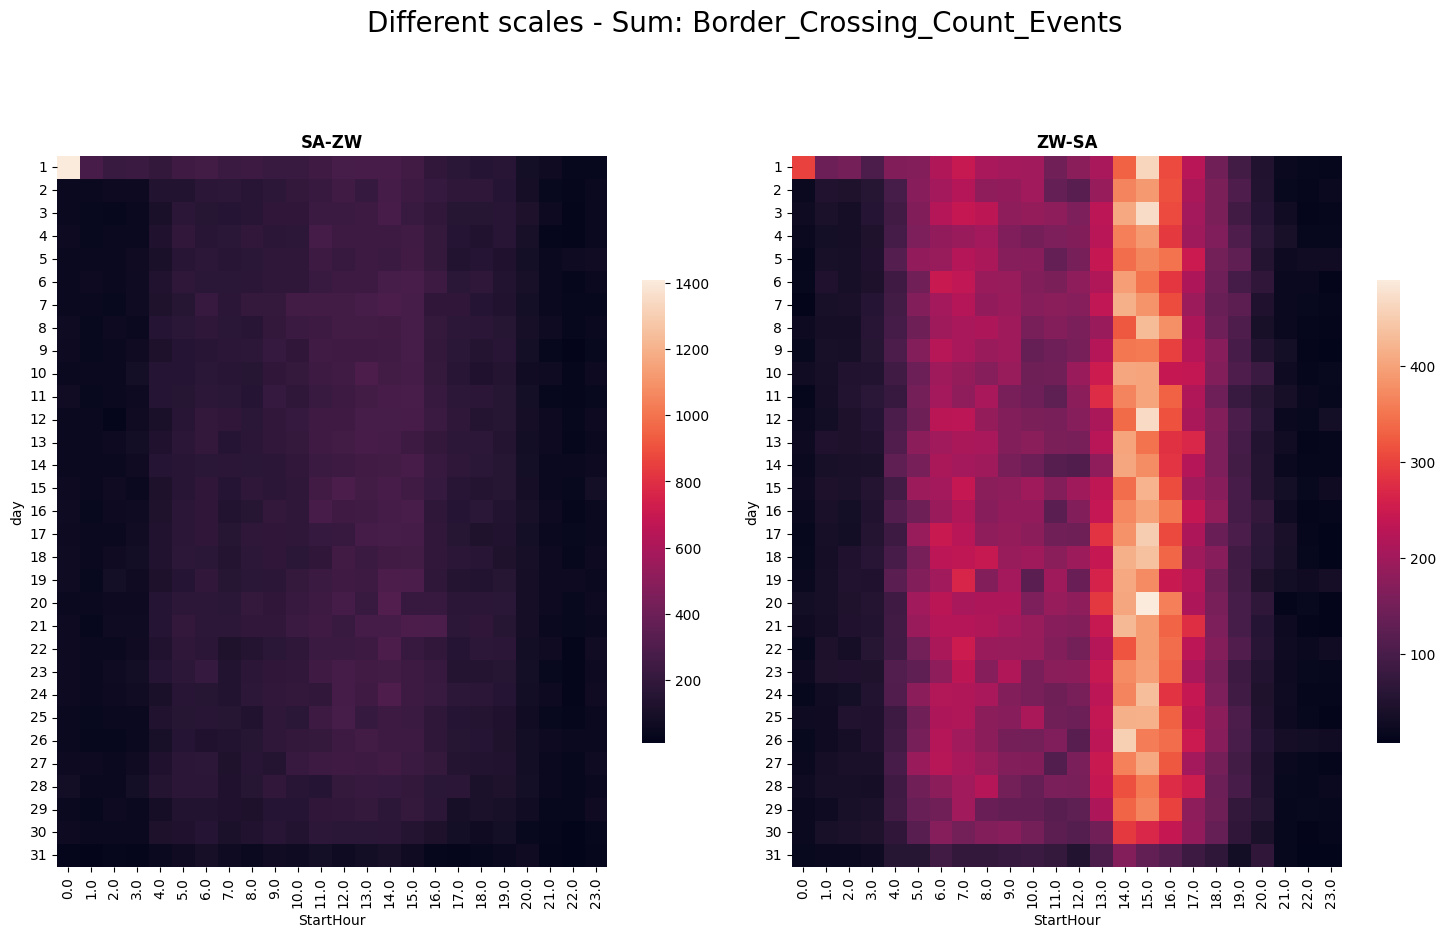

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='SA-Zimbabwe')],index='day',columns='StartHour',values='value',aggfunc='sum')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='Zimbabwe-SA')],index='day',columns='StartHour',values='value',aggfunc='sum')

sns.heatmap(s1, ax=ax1,square=True,cbar_kws={"shrink": 0.5})
sns.heatmap(s2, ax=ax2,square=True,cbar_kws={"shrink": 0.5})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Different scales - Sum: Border_Crossing_Count_Events', fontsize=20)
plt.tight_layout()

plt.show()

In [9]:

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='SA-Zimbabwe')],index='day',columns='StartHour',values='value',aggfunc='median')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='Zimbabwe-SA')],index='day',columns='StartHour',values='value',aggfunc='median')

In [10]:
df1['var'].unique()

array(['Border_Crossing_Count_Events', 'Border_Crossing_Median_Minutes',
       'Border_Crossing_Bottom_10__Minutes',
       'Border_Crossing_Top_10__Minutes'], dtype=object)

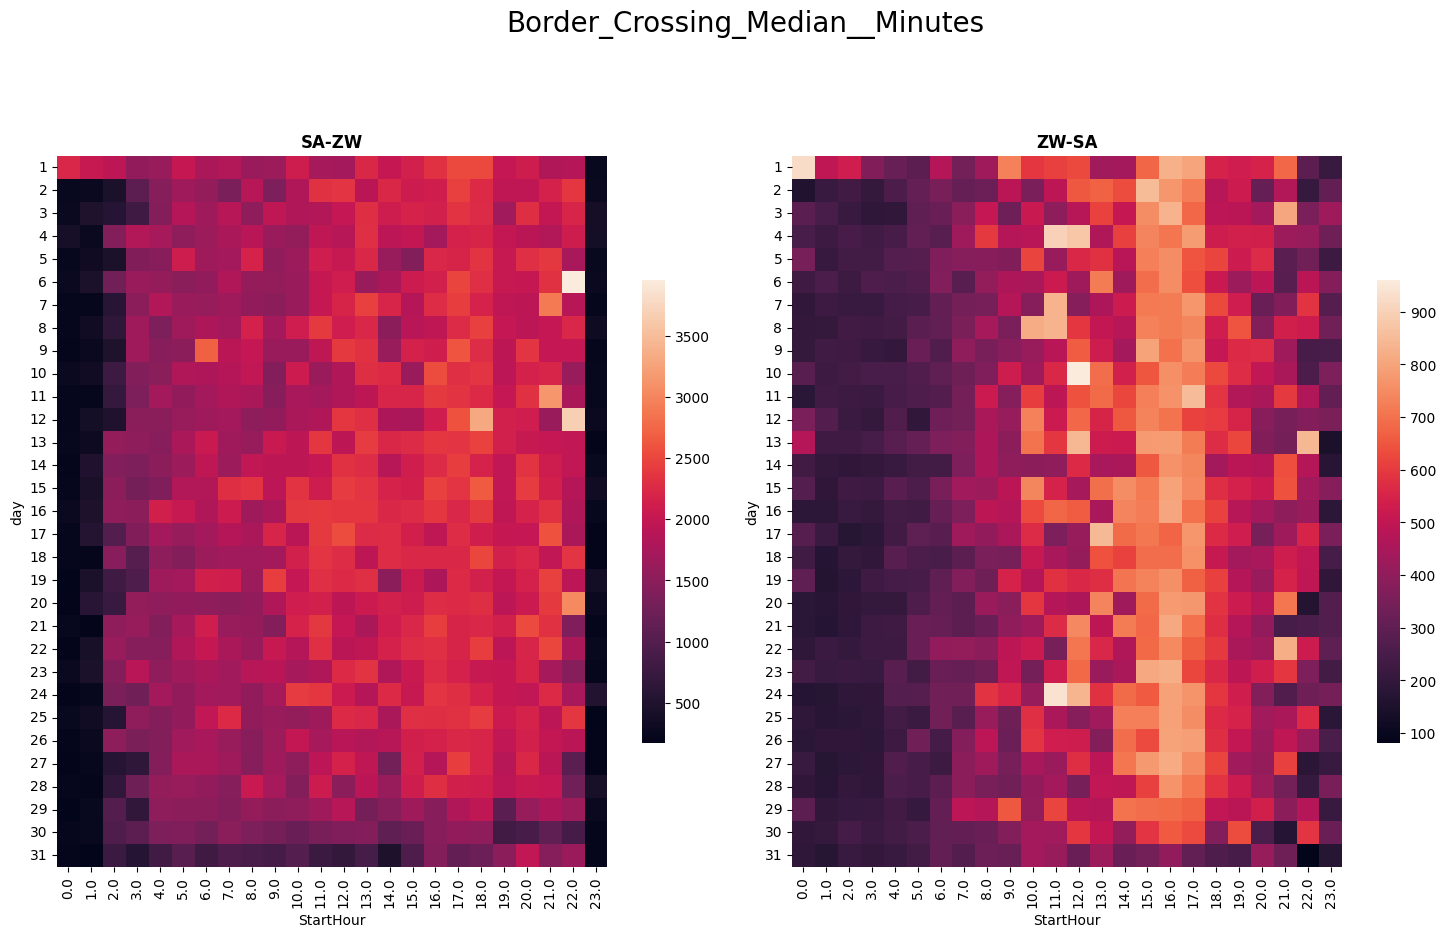

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

sns.heatmap(s1, ax=ax1,square=True, cbar_kws={"shrink": 0.5})
sns.heatmap(s2, ax=ax2,square=True, cbar_kws={"shrink": 0.5})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Border_Crossing_Median__Minutes', fontsize=20)
plt.tight_layout()

plt.show()

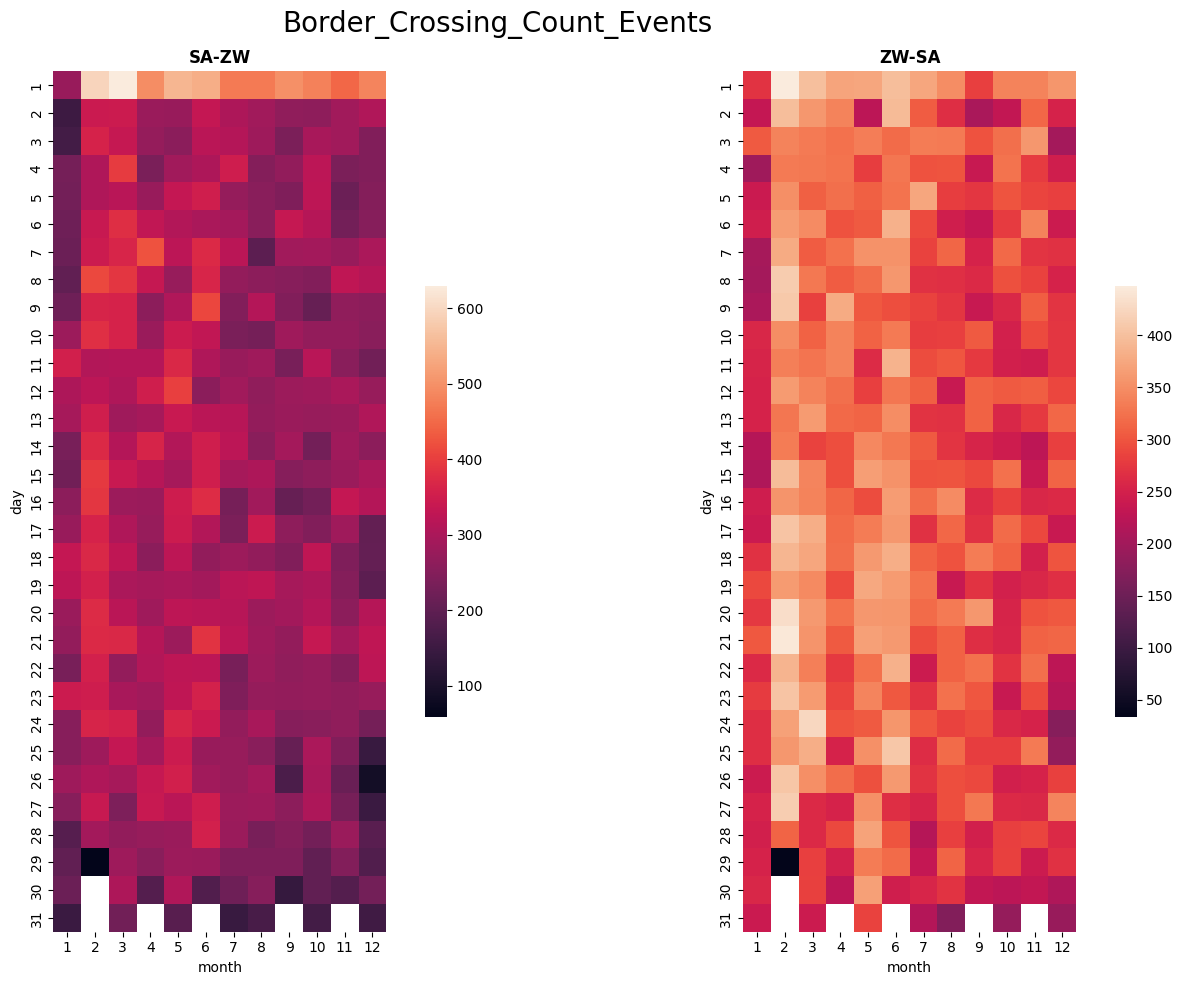

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='SA-Zimbabwe')],index='day',columns='month',values='value',aggfunc='sum')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='Zimbabwe-SA')],index='day',columns='month',values='value',aggfunc='sum')

sns.heatmap(s1, ax=ax1,square=True, cbar_kws={"shrink": 0.5})
sns.heatmap(s2, ax=ax2,square=True, cbar_kws={"shrink": 0.5})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Border_Crossing_Count_Events', fontsize=20)
plt.tight_layout()

plt.show()

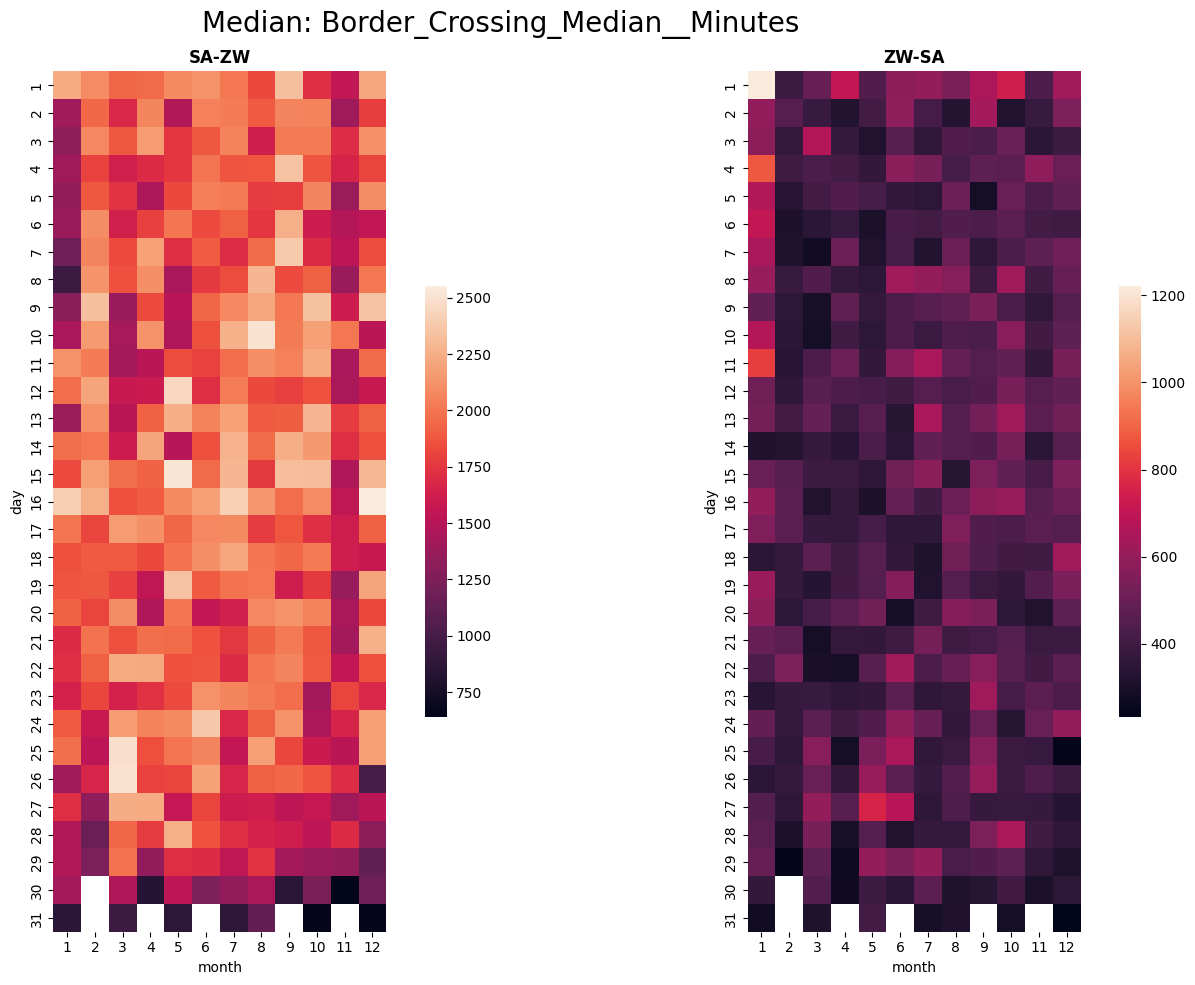

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='SA-Zimbabwe')],index='day',columns='month',values='value',aggfunc='median')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='Zimbabwe-SA')],index='day',columns='month',values='value',aggfunc='median')

sns.heatmap(s1, ax=ax1,square=True, cbar_kws={"shrink": 0.5})
sns.heatmap(s2, ax=ax2,square=True, cbar_kws={"shrink": 0.5})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Median: Border_Crossing_Median__Minutes', fontsize=20)
plt.tight_layout()

plt.show()

In [14]:
df1.head()

,Unnamed: 0,date,StartHour,Direction,var,value,year,month,YM,day
0,0,2017-02-01,0.0,SA-Zimbabwe,Border_Crossing_Count_Events,22.0,2017,2,2017-02,1
1,1,2017-02-01,13.0,SA-Zimbabwe,Border_Crossing_Count_Events,4.0,2017,2,2017-02,1
2,2,2017-02-01,12.0,SA-Zimbabwe,Border_Crossing_Count_Events,1.0,2017,2,2017-02,1
3,3,2017-02-01,14.0,SA-Zimbabwe,Border_Crossing_Count_Events,2.0,2017,2,2017-02,1
4,4,2017-02-01,14.0,Zimbabwe-SA,Border_Crossing_Count_Events,2.0,2017,2,2017-02,1


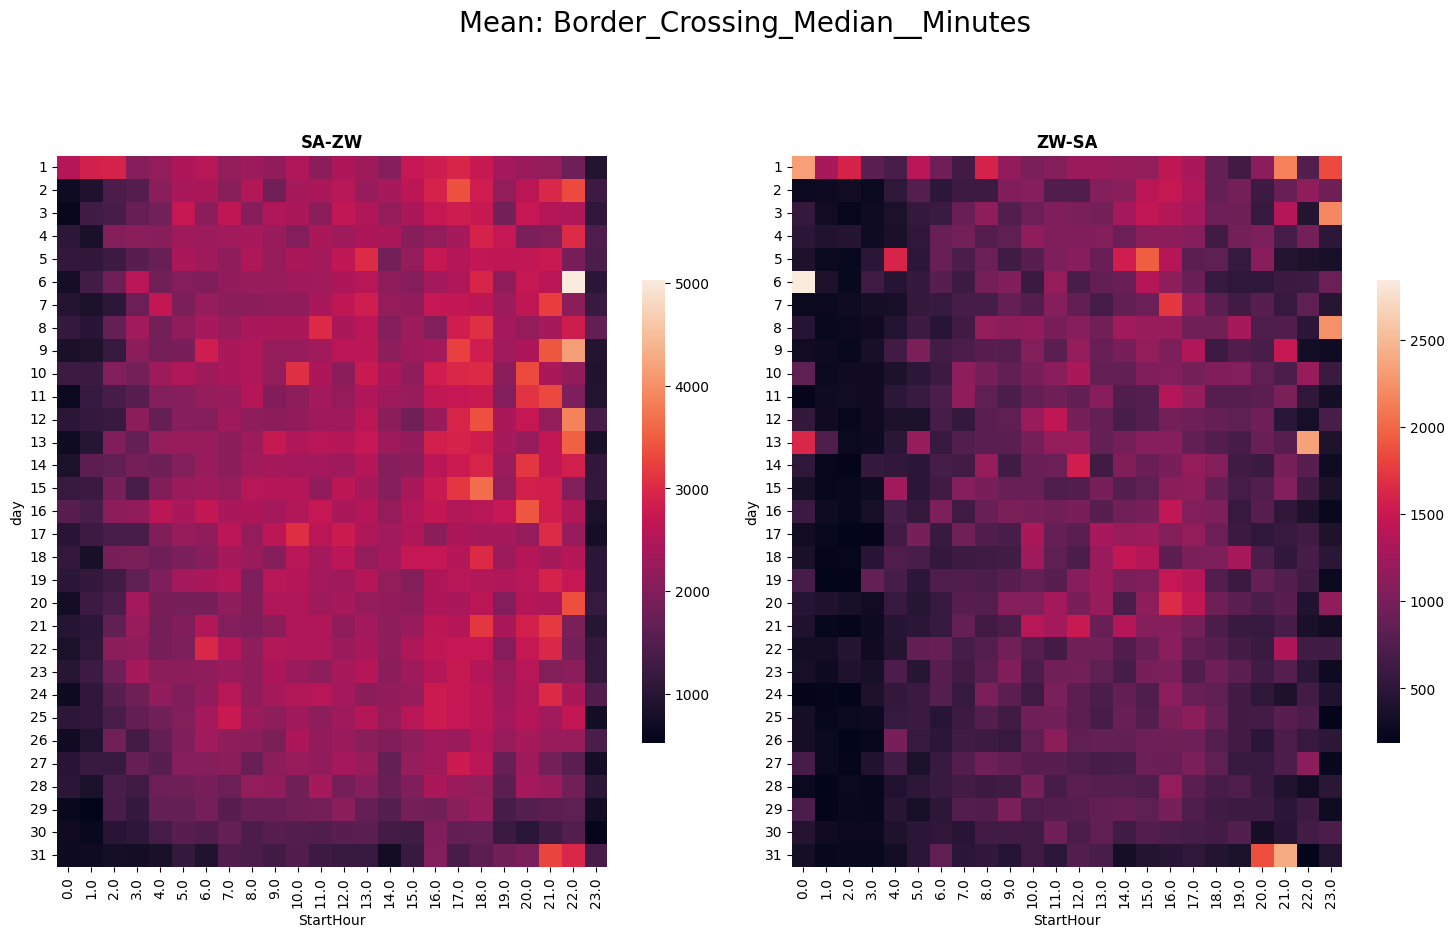

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='SA-Zimbabwe')],index='day',columns='StartHour',values='value',aggfunc='mean')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='Zimbabwe-SA')],index='day',columns='StartHour',values='value',aggfunc='mean')

sns.heatmap(s1, ax=ax1,square=True, cbar_kws={"shrink": 0.5})
sns.heatmap(s2, ax=ax2,square=True, cbar_kws={"shrink": 0.5})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Mean: Border_Crossing_Median__Minutes', fontsize=20)
plt.tight_layout()

plt.show()

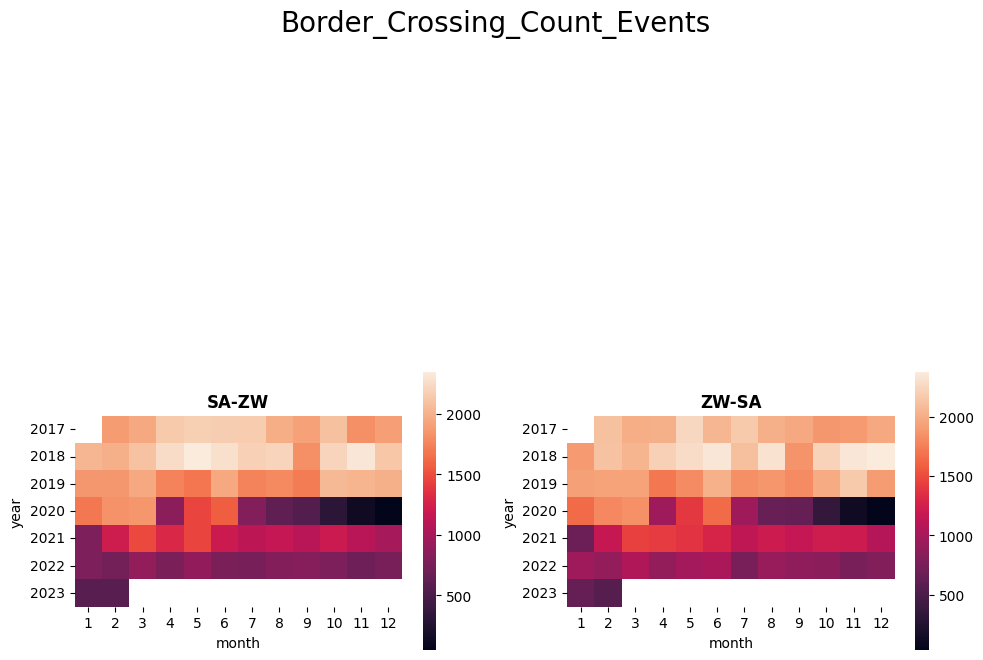

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='SA-Zimbabwe')],index='year',columns='month',values='value',aggfunc='sum')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Count_Events')&(df1['Direction']=='Zimbabwe-SA')],index='year',columns='month',values='value',aggfunc='sum')

sns.heatmap(s1, ax=ax1,square=True, cbar_kws={"shrink": 0.3})#,vmin=500,vmax=3250)
sns.heatmap(s2, ax=ax2,square=True, cbar_kws={"shrink": 0.3})#,vmin=500,vmax=3250)

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Border_Crossing_Count_Events', fontsize=20)
fig.tight_layout()

plt.show()

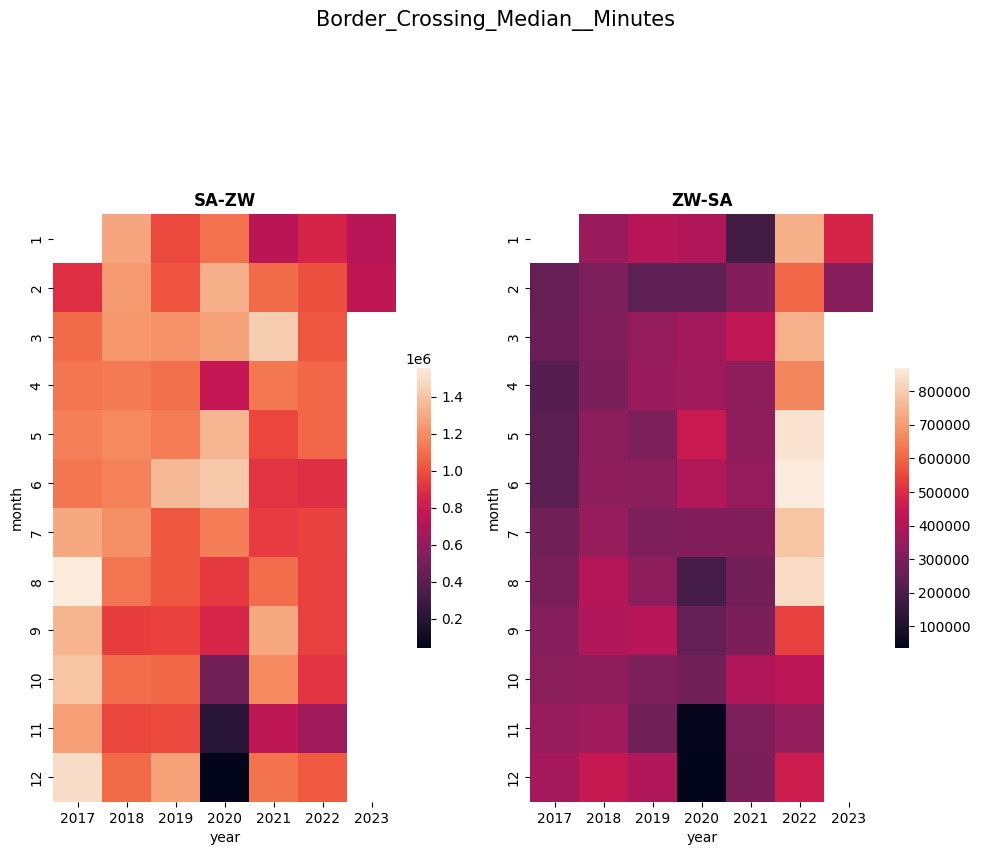

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

s1 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='SA-Zimbabwe')],index='month',columns='year',values='value',aggfunc='sum')
s2 = pd.pivot_table(data=df1[(df1['var']=='Border_Crossing_Median_Minutes')&(df1['Direction']=='Zimbabwe-SA')],index='month',columns='year',values='value',aggfunc='sum')

sns.heatmap(s1, ax=ax1,square=True, cbar_kws={"shrink": 0.3})
sns.heatmap(s2, ax=ax2,square=True, cbar_kws={"shrink": 0.3})

ax1.set_title('SA-ZW', weight='bold')
ax2.set_title('ZW-SA', weight='bold')


fig.suptitle('Border_Crossing_Median__Minutes', fontsize=15)
fig.tight_layout()

plt.show()

<a id="2"></a>
## Crickmay dataset: 1 day and 1-month aggregates

In [18]:
df1['v2'] = df1['Direction']+"|"+df1['var']

In [19]:
df1.columns

Index(['Unnamed: 0', 'date', 'StartHour', 'Direction', 'var', 'value', 'year',
       'month', 'YM', 'day', 'v2'],
      dtype='object')

In [20]:
piv = pd.pivot_table(data=df1, index=['date','StartHour','Direction'],columns=['var'],values='value')#.reset_index()
piv

var                               Border_Crossing_Bottom_10__Minutes  \
date       StartHour Direction                                         
2017-02-01 0.0       SA-Zimbabwe                          683.400000   
                     Zimbabwe-SA                          324.500000   
           1.0       SA-Zimbabwe                         1426.600000   
                     Zimbabwe-SA                          204.000000   
           2.0       SA-Zimbabwe                         2568.600000   
...                                                              ...   
2023-02-28 18.0      Zimbabwe-SA                          888.566666   
           19.0      SA-Zimbabwe                         1445.743333   
                     Zimbabwe-SA                         3773.300000   
           20.0      Zimbabwe-SA                          441.833333   
           23.0      Zimbabwe-SA                          475.150000   

var                               Border_Crossing_Count_Events  \
date       StartHour Direction                                   
2017-02-01 0.0       SA-Zimbabwe                          22.0   
                     Zimbabwe-SA                           6.0   
           1.0       SA-Zimbabwe                           3.0   
                     Zimbabwe-SA                           1.0   
           2.0       SA-Zimbabwe                           3.0   
...                                                        ...   
2023-02-28 18.0      Zimbabwe-SA                           1.0   
           19.0      SA-Zimbabwe                           4.0   
                     Zimbabwe-SA                           1.0   
           20.0      Zimbabwe-SA                           1.0   
           23.0      Zimbabwe-SA                           1.0   

var                               Border_Crossing_Median_Minutes  \
date       StartHour Direction                                     
2017-02-01 0.0       SA-Zimbabwe                     1664.500000   
                     Zimbabwe-SA                      613.000000   
           1.0       SA-Zimbabwe                     3349.000000   
                     Zimbabwe-SA                      204.000000   
           2.0       SA-Zimbabwe                     3355.000000   
...                                                          ...   
2023-02-28 18.0      Zimbabwe-SA                      888.566666   
           19.0      SA-Zimbabwe                     2092.491666   
                     Zimbabwe-SA                     3773.300000   
           20.0      Zimbabwe-SA                      441.833333   
           23.0      Zimbabwe-SA                      475.150000   

var                               Border_Crossing_Top_10__Minutes  
date       StartHour Direction                                     
2017-02-01 0.0       SA-Zimbabwe                      6648.900000  
                     Zimbabwe-SA                       615.000000  
           1.0       SA-Zimbabwe                      9247.400000  
                     Zimbabwe-SA                       204.000000  
           2.0       SA-Zimbabwe                      6473.400000  
...                                                           ...  
2023-02-28 18.0      Zimbabwe-SA                       888.566666  
           19.0      SA-Zimbabwe                      3045.151666  
                     Zimbabwe-SA                      3773.300000  
           20.0      Zimbabwe-SA                       441.833333  
           23.0      Zimbabwe-SA                       475.150000  

[68318 rows x 4 columns]

In [21]:
piv = piv.reset_index()

In [22]:
piv['ym'] = piv['date'].dt.year.astype(str) + "-"+ piv['date'].dt.month.astype(str).str.zfill(2)

In [23]:
monthly = piv.groupby(['Direction','ym']).agg({'Border_Crossing_Bottom_10__Minutes':['min','max','mean','median','var','std'],
       'Border_Crossing_Count_Events':['sum'], 'Border_Crossing_Median_Minutes':['min','max','mean','median','var','std'],
       'Border_Crossing_Top_10__Minutes':['min','max','mean','median','var','std']})

In [24]:
daily = piv.groupby(['Direction','date']).agg({'Border_Crossing_Bottom_10__Minutes':['min','max','mean','median','var','std'],
       'Border_Crossing_Count_Events':['sum'], 'Border_Crossing_Median_Minutes':['min','max','mean','median','var','std'],
       'Border_Crossing_Top_10__Minutes':['min','max','mean','median','var','std']})

In [25]:
daily.columns = ["_".join(x) for x in daily.columns]
monthly.columns = ["_".join(x) for x in monthly.columns]

<a id="3"></a>
## Export of daily and monthly aggregates

In [26]:
daily.to_csv("daily agg Crickmay - correlate time and volume.csv")
monthly.to_csv("monthly agg Crickmay - correlate time and volume.csv")